In [15]:
import sys, os
sys.path.append(os.path.abspath("../"))

from src.sentiment import polarity, sentimentAnalyzer





In [16]:
import pandas as pd

words = [
    ("happy", 0.8,   "Positive"),
    ("exciting", 0.3,"Positive"),
    ("good", 0.7,    "Positive"),
    ("rich", 0.375,  "Positive"),
    ("smile", 0.3,   "Positive"),
    ("sad", -0.5,    "Negative"),
    ("disappointed", -0.75, "Negative"),
    ("bad", -0.699,  "Negative"),
    ("poor", -0.4,   "Negative"),
    ("anger", -0.7,  "Negative"),
    ("food", 0.0,    "Neutral"),
    ("animal", 0.0,  "Neutral"),
]

df_words = pd.DataFrame(words, columns=["Word","Expected_Polarity","Expected_Sentiment"])
df_words["Polarity"]  = df_words["Word"].apply(polarity)
df_words["Sentiment"] = df_words["Word"].apply(sentimentAnalyzer)
df_words["Sentiment_Match"] = (df_words["Sentiment"] == df_words["Expected_Sentiment"])
df_words


,Word,Expected_Polarity,Expected_Sentiment,Polarity,Sentiment,Sentiment_Match
0,happy,0.800,Positive,0.800,Positive,True
1,exciting,0.300,Positive,0.300,Positive,True
2,good,0.700,Positive,0.700,Positive,True
3,rich,0.375,Positive,0.375,Positive,True
4,smile,0.300,Positive,0.300,Positive,True
5,sad,-0.500,Negative,-0.500,Negative,True
6,disappointed,-0.750,Negative,-0.750,Negative,True
7,bad,-0.699,Negative,-0.700,Negative,True
8,poor,-0.400,Negative,-0.400,Negative,True
9,anger,-0.700,Negative,-0.700,Negative,True


In [4]:
CSV_PATH = r"C:\Users\amria\Documents\Fourth year (AI)\Programming for Artificial Int\MyAIProject\data\raw\Amazon.csv"


import pandas as pd

df = pd.read_csv(CSV_PATH, encoding="latin-1", low_memory=False)

print("Shape:", df.shape)
df.head()


Shape: (413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [5]:
df.columns.tolist()


['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

In [12]:
TEXT_COL    = "Reviews"     # غيّرها لو اسم عمودك مختلف
PRODUCT_COL = "Product Name"    # غيّرها لو اسم عمودك مختلف
TEXT_COL, PRODUCT_COL


('Reviews', 'Product Name')

In [7]:
product_counts = df[PRODUCT_COL].value_counts(dropna=False)
product_counts.head(15)


Product Name
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)          1451
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)       1241
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                                 1194
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink         1129
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone                   1127
Apple iPhone 5s 32GB (Silver) - AT&T                                                          1118
BLU Energy X Plus Smartphone - With 4000 mAh Super Battery- US GSM Unlocked - Grey            1111
Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black        1109
Samsung Galaxy S Duos II GT-S7582 Factory Unlocked Cellphone, International Version, White    1108
Samsung Galaxy S Duos GT-S7562 GSM Unlocked Touchscreen 5MP Camera Smartphone White           10

In [10]:
over = product_counts[product_counts >= 1000]
CHOSEN_PRODUCT = over.index[0] if len(over) else product_counts.index[0]
CHOSEN_PRODUCT


'Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)'

In [13]:
df_prod = df[df[PRODUCT_COL] == CHOSEN_PRODUCT].copy()

num_rows, num_cols = df_prod.shape
review_lengths = df_prod[TEXT_COL].astype(str).str.len()

summary = {
    "Product name": CHOSEN_PRODUCT,
    "Number of rows": num_rows,
    "Number of columns": num_cols,
    "Shortest review length": int(review_lengths.min()),
    "Longest review length": int(review_lengths.max()),
    "Average review length": float(review_lengths.mean()),
}
summary


{'Product name': 'Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)',
 'Number of rows': 1451,
 'Number of columns': 6,
 'Shortest review length': 2,
 'Longest review length': 1465,
 'Average review length': 107.46864231564439}

In [17]:
from src.sentiment import polarity, sentimentAnalyzer

df_prod["Polarity"]  = df_prod[TEXT_COL].apply(polarity)
df_prod["Sentiment"] = df_prod[TEXT_COL].apply(sentimentAnalyzer)

df_prod[[PRODUCT_COL, TEXT_COL, "Polarity", "Sentiment"]].head()


,Product Name,Reviews,Polarity,Sentiment
16429,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,good buy,0.70,Positive
16430,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,great phonegood price,0.80,Positive
16431,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,I bought and send to Africa the two are not wo...,0.00,Neutral
16432,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,Had difficulty connecting to wf,0.00,Neutral
16433,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,very good,0.91,Positive


In [18]:
sentiment_counts = df_prod["Sentiment"].value_counts()
sentiment_counts


Sentiment
Positive    768
Neutral     573
Negative    110
Name: count, dtype: int64

Matplotlib is building the font cache; this may take a moment.


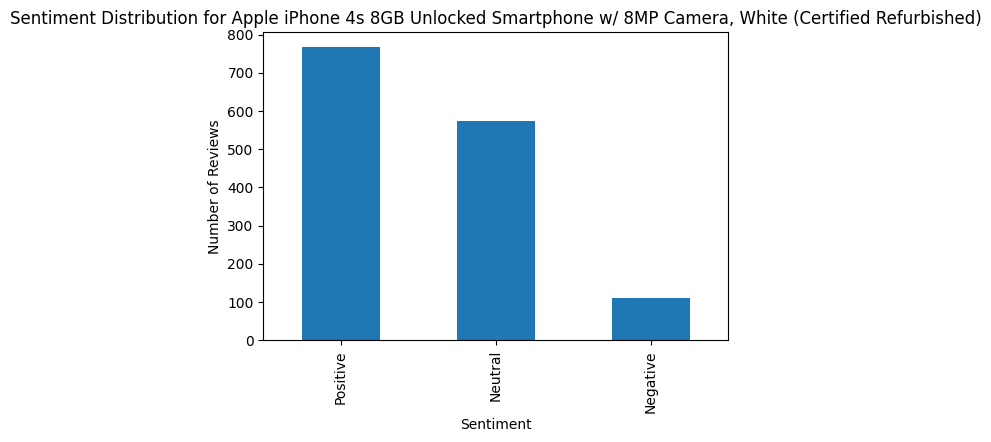

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar")
plt.title(f"Sentiment Distribution for {CHOSEN_PRODUCT}")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [20]:
# Example positive review
print("Positive example:\n", df_prod[df_prod["Sentiment"]=="Positive"].iloc[0][TEXT_COL])
print("Polarity:", df_prod[df_prod["Sentiment"]=="Positive"].iloc[0]["Polarity"])
print("-"*60)

# Example negative review
print("Negative example:\n", df_prod[df_prod["Sentiment"]=="Negative"].iloc[0][TEXT_COL])
print("Polarity:", df_prod[df_prod["Sentiment"]=="Negative"].iloc[0]["Polarity"])
print("-"*60)

# Example neutral review
print("Neutral example:\n", df_prod[df_prod["Sentiment"]=="Neutral"].iloc[0][TEXT_COL])
print("Polarity:", df_prod[df_prod["Sentiment"]=="Neutral"].iloc[0]["Polarity"])


Positive example:
 good buy
Polarity: 0.7
------------------------------------------------------------
Negative example:
 Bad batery
Polarity: -0.6999999999999998
------------------------------------------------------------
Neutral example:
 I bought and send to Africa the two are not working
Polarity: 0.0


In [23]:
df_mismatch = df_prod[(df_prod["Polarity"] > 0.2) & (df_prod["Sentiment"]=="Negative") | 
    (df_prod["Polarity"] < -0.2) & (df_prod["Sentiment"]=="Positive")]

df_mismatch.head(5)

"""During the error analysis phase, we attempted to identify instances where the degree of polarization conflicted with the final emotion classification.

The mismatch data frame returned no samples. This indicates that TextBlob performed consistently on this dataset. Reviews of this product are relatively straightforward and do not contain much sarcasm or conflicting emotions, thus reducing the likelihood of misclassification.
"""

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Polarity,Sentiment


In [24]:
df_prod.to_csv("../data/processed/iphone_sentiment_results.csv", index=False)
